<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Loan Approval Prediction Dataset
</h1>  
     
</div>

<p><center style="color:blue; font-family: 'Dancing Script'; font-size:30px;">🙏🏿Thanks for visiting my notebook 🕺🏿</center></p>

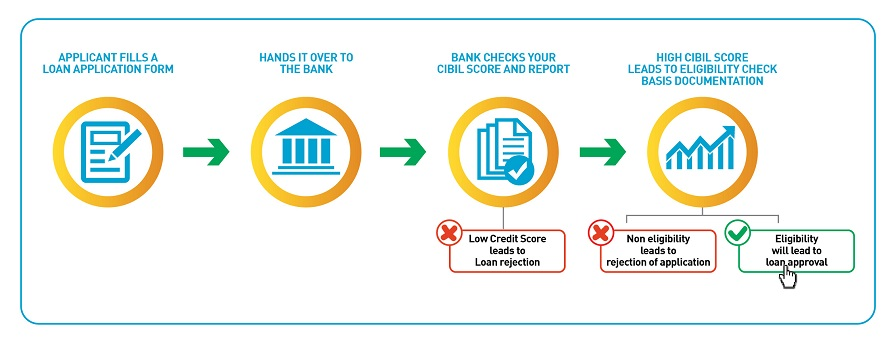

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: The goal for this competition is to predict whether an applicant is approved for a loan.

**Evaluation**: Submissions are evaluated using the Area under ROC Cruve.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

<h3 align="center"><font color='black'>💡 Evalaution Metric :</font></h3>
    
    
    
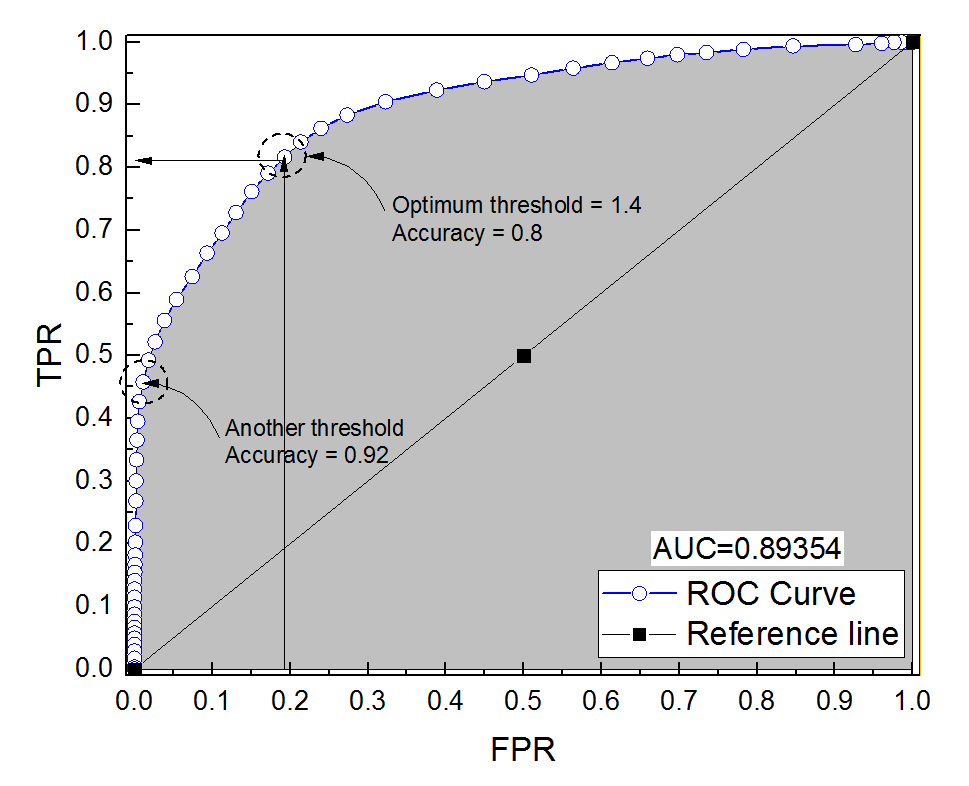




<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Packages :</font></h3>
    
🎭we are Importing several Python packages   


🥽 XGBoost (eXtreme Gradient Boosting) and LightGBM are both powerful machine learning algorithms used for supervised learning tasks, particularly in the realm of gradient boosting

    
🎍Numpy, Pandas, Matplotlib, Seaborn :NumPy for numerical computing, Pandas for data manipulation, Matplotlib for plotting, and Seaborn for statistical visualization.
    



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

In [3]:
df_origi = pd.read_csv('/kaggle/input/ps4e9-original-data-loan-approval-prediction/credit_risk_dataset.csv')

In [4]:
df_origi.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [5]:
df_origi.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
df_origi.shape

(32581, 12)

In [7]:
df_train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [8]:
df_train.shape

(58645, 13)

In [9]:
df_train.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0  
2                         N                          10            0  
3                         N                           5            0  
4                         N                           3            0

In [10]:
df_train.describe()

id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%     8000.000000      10.750000             0.140000   
75%    12000.000000      12.990000             0.210000   
max    35000.000000      23.220000             0.830000   

       cb_person_cred_hist_length   loan_status  
count                58645.000000  58645.000000  
mean                     5.813556      0.142382  
std                      4.029196      0.349445  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      8.000000      0.000000  
max                     30.000000      1.000000

In [11]:
df_test.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   
3  58648          33          50000                  RENT                4.0   
4  58649          26         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.36                         N                           2  
1                 0.10                         Y                           4  
2                 0.13                         Y                           2  
3                 0.14                         N                           7  
4                 0.15                         Y                           4

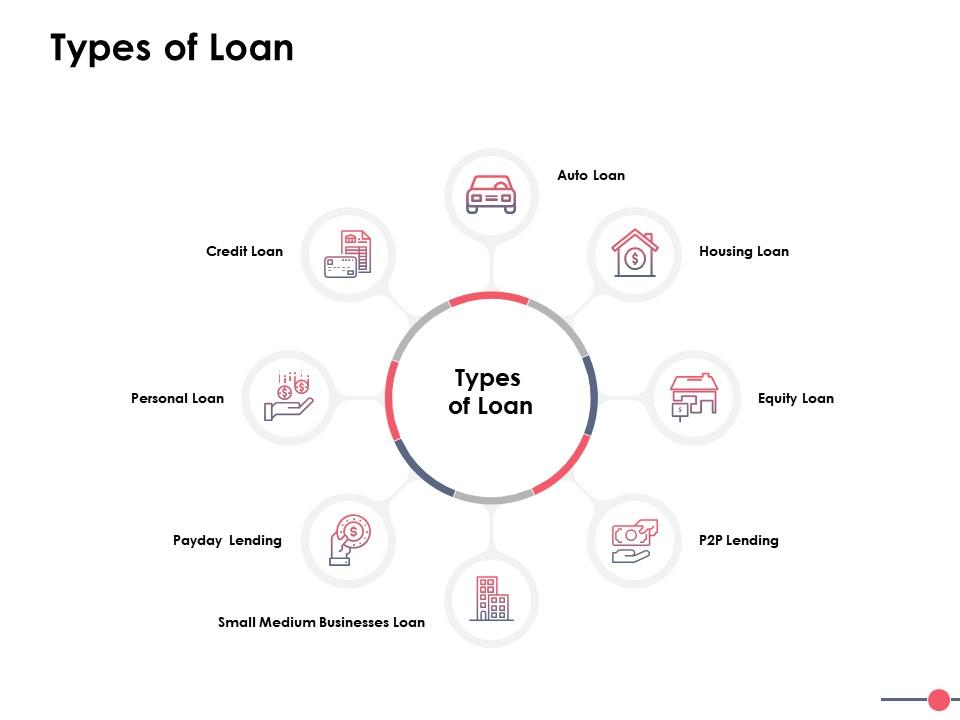

In [12]:
df_sub.head()

id  loan_status
0  58645          0.5
1  58646          0.5
2  58647          0.5
3  58648          0.5
4  58649          0.5

In [13]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [14]:
df_train.shape,df_test.shape

((58645, 12), (39098, 11))

In [15]:
df_train = pd.concat([df_train,df_origi],axis=0)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91226 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           90331 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               88110 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.0+ MB


In [17]:
df_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [18]:
df_test.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [19]:
df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
df_train['loan_int_rate'].fillna(df_train['loan_int_rate'].mean(), inplace=True)

In [20]:
df_train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgreen; font-size:100%; text-align:left">

<h3 align="center"><font color='green'>💡 Summary from above :</font></h3>

1. The dataset represents relatively young borrowers with moderate incomes.    
1. There are potential outliers in age, employment length, and income.
1. Most loans are small to moderate in size, with interest rates commonly around 8-13%.
1. The dataset includes a non-trivial portion of defaults, around 14.2%, which could provide useful information for predicting loan default risk.
1. There are few categorical Features and there is no missing data present 

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">⚠🍜Exploratory Data Analysis♒🌊</h1>  
     
</div>

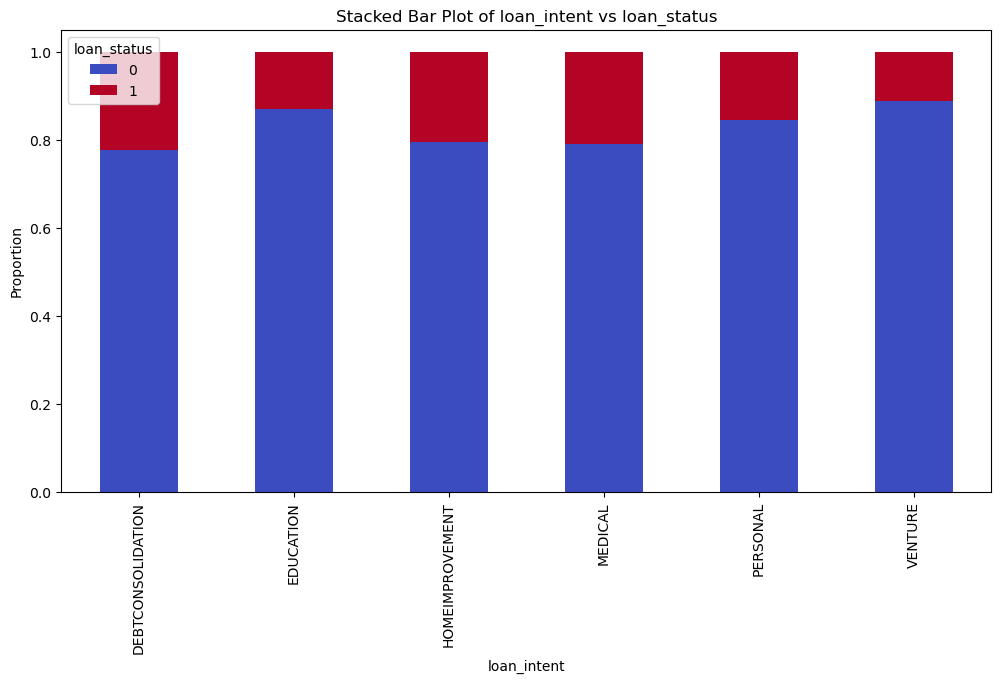

In [21]:
def stacked_bar_plot(df, feature, target='loan_status'):
    crosstab = pd.crosstab(df[feature], df[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')
    plt.title(f'Stacked Bar Plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.show()
stacked_bar_plot(df_train, 'loan_intent')

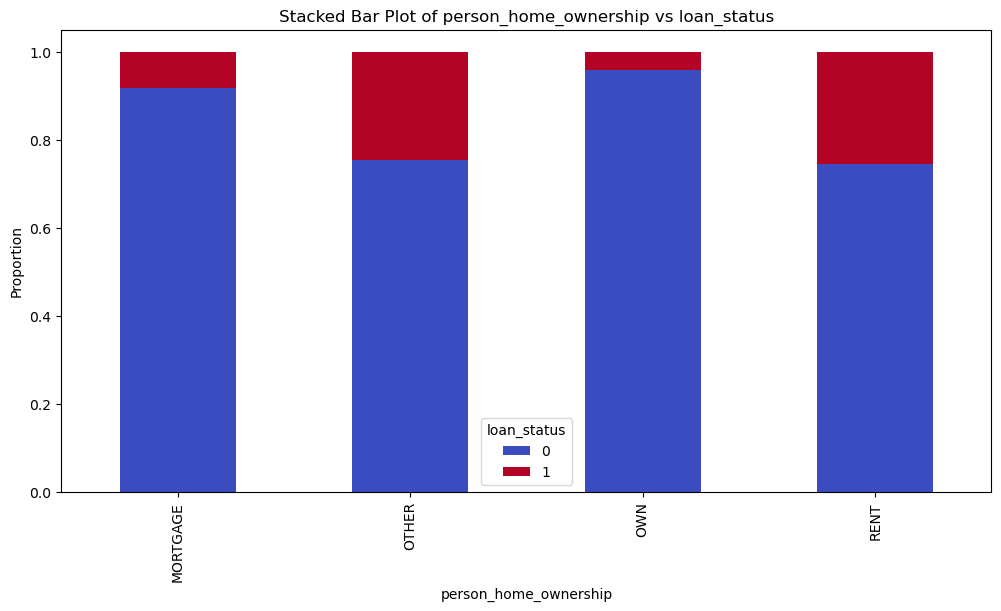

In [22]:
stacked_bar_plot(df_train, 'person_home_ownership')

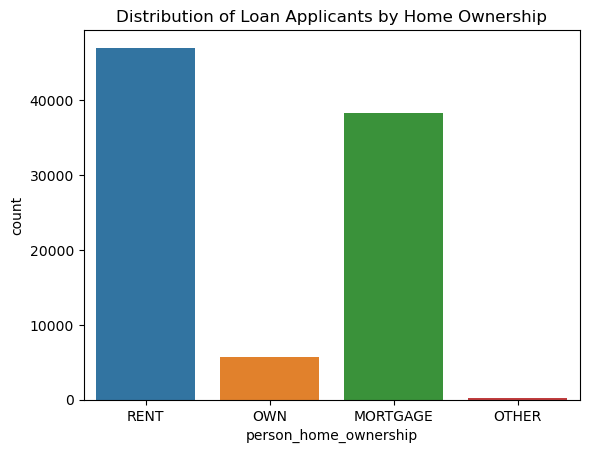

In [23]:
sns.countplot(data=df_train, x='person_home_ownership')
plt.title('Distribution of Loan Applicants by Home Ownership')
plt.show()


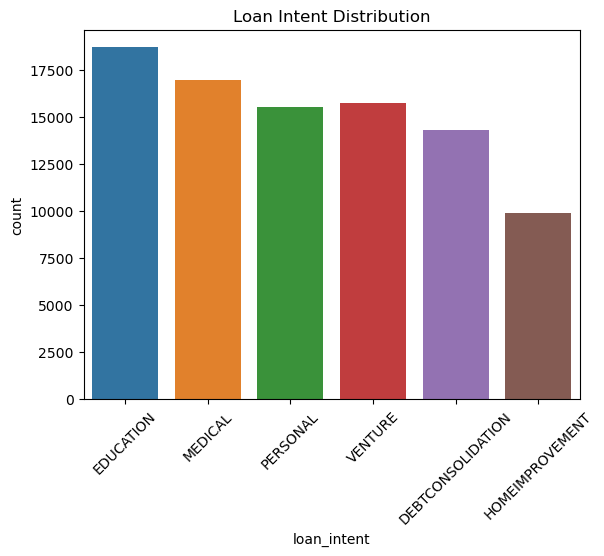

In [24]:
sns.countplot(data=df_train, x='loan_intent')
plt.title('Loan Intent Distribution')
plt.xticks(rotation=45)
plt.show()


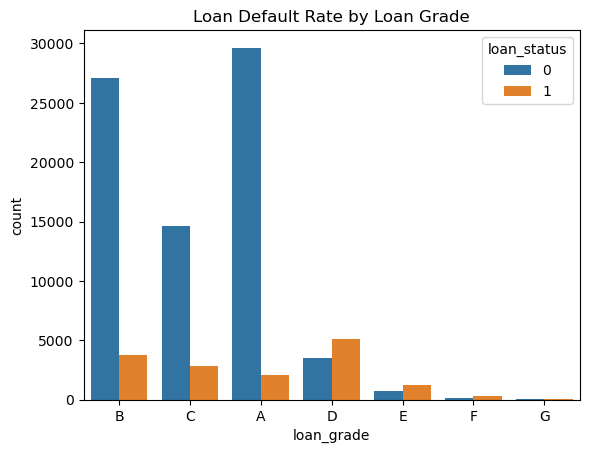

In [25]:
sns.countplot(data=df_train, x='loan_grade', hue='loan_status')
plt.title('Loan Default Rate by Loan Grade')
plt.show()


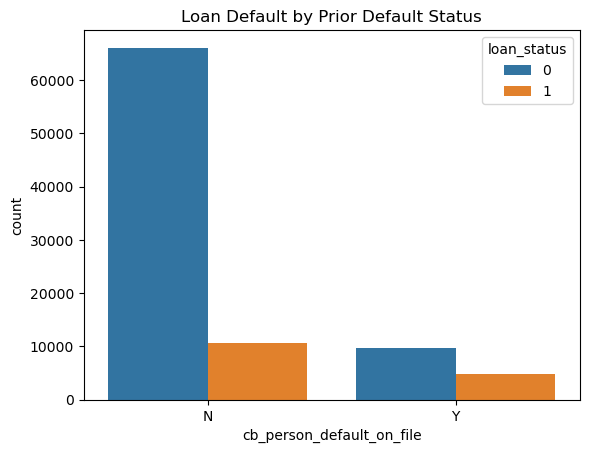

In [26]:
sns.countplot(data=df_train, x='cb_person_default_on_file', hue='loan_status')
plt.title('Loan Default by Prior Default Status')
plt.show()


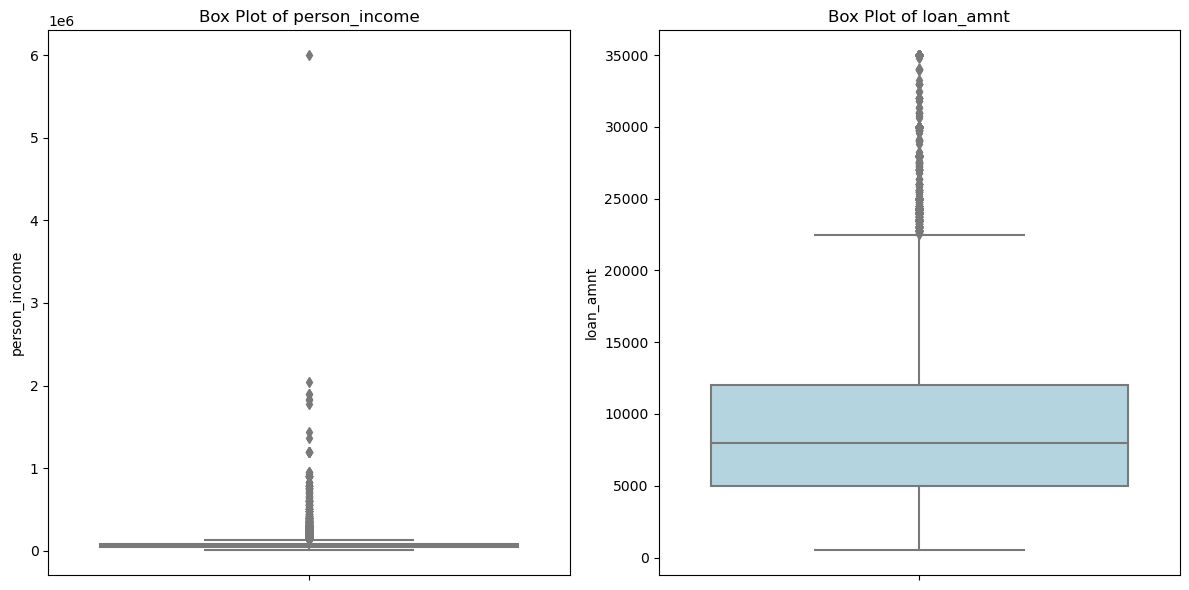

In [27]:
def plot_boxplots(df, columns):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[col], color='lightblue')
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df_train, ['person_income', 'loan_amnt'])

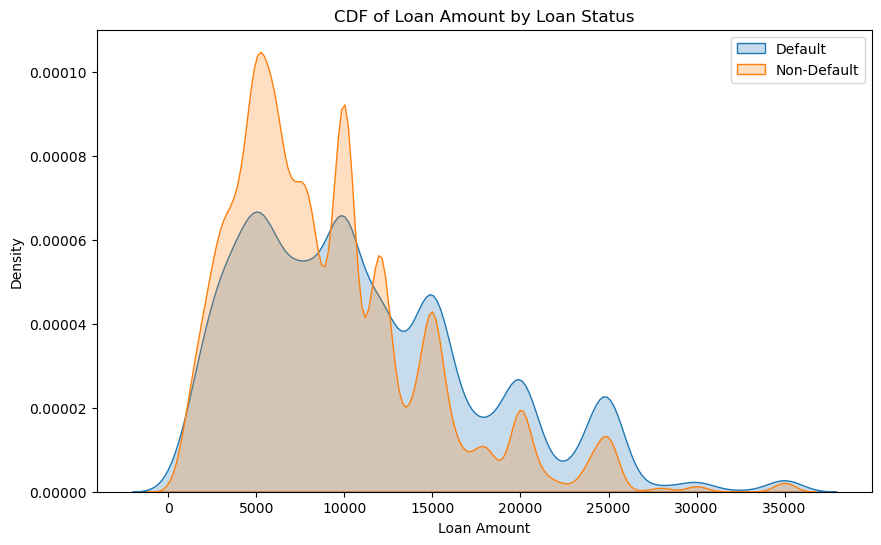

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train['loan_status'] == 1]['loan_amnt'], label='Default', fill=True)
sns.kdeplot(df_train[df_train['loan_status'] == 0]['loan_amnt'], label='Non-Default', fill=True)
plt.title('CDF of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

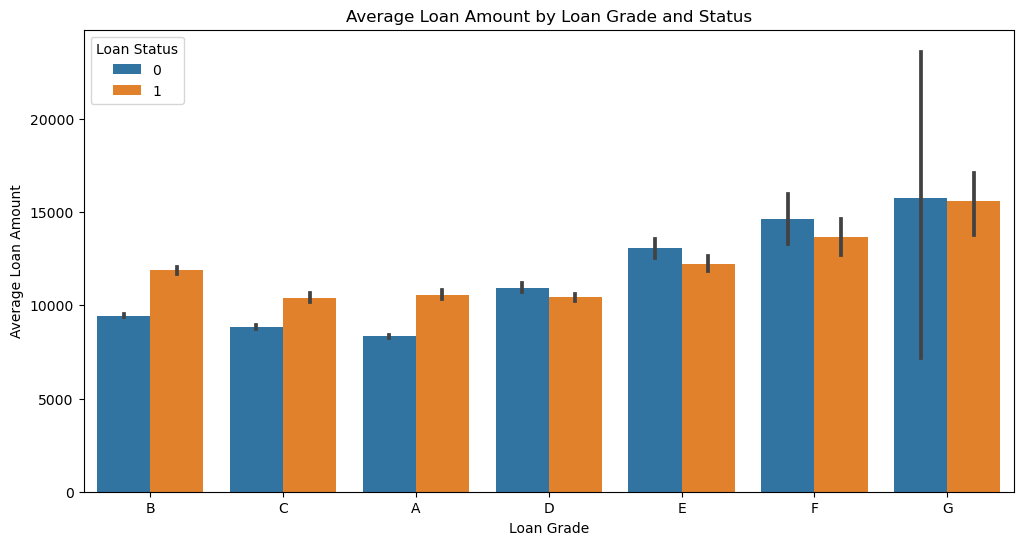

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=df_train, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()


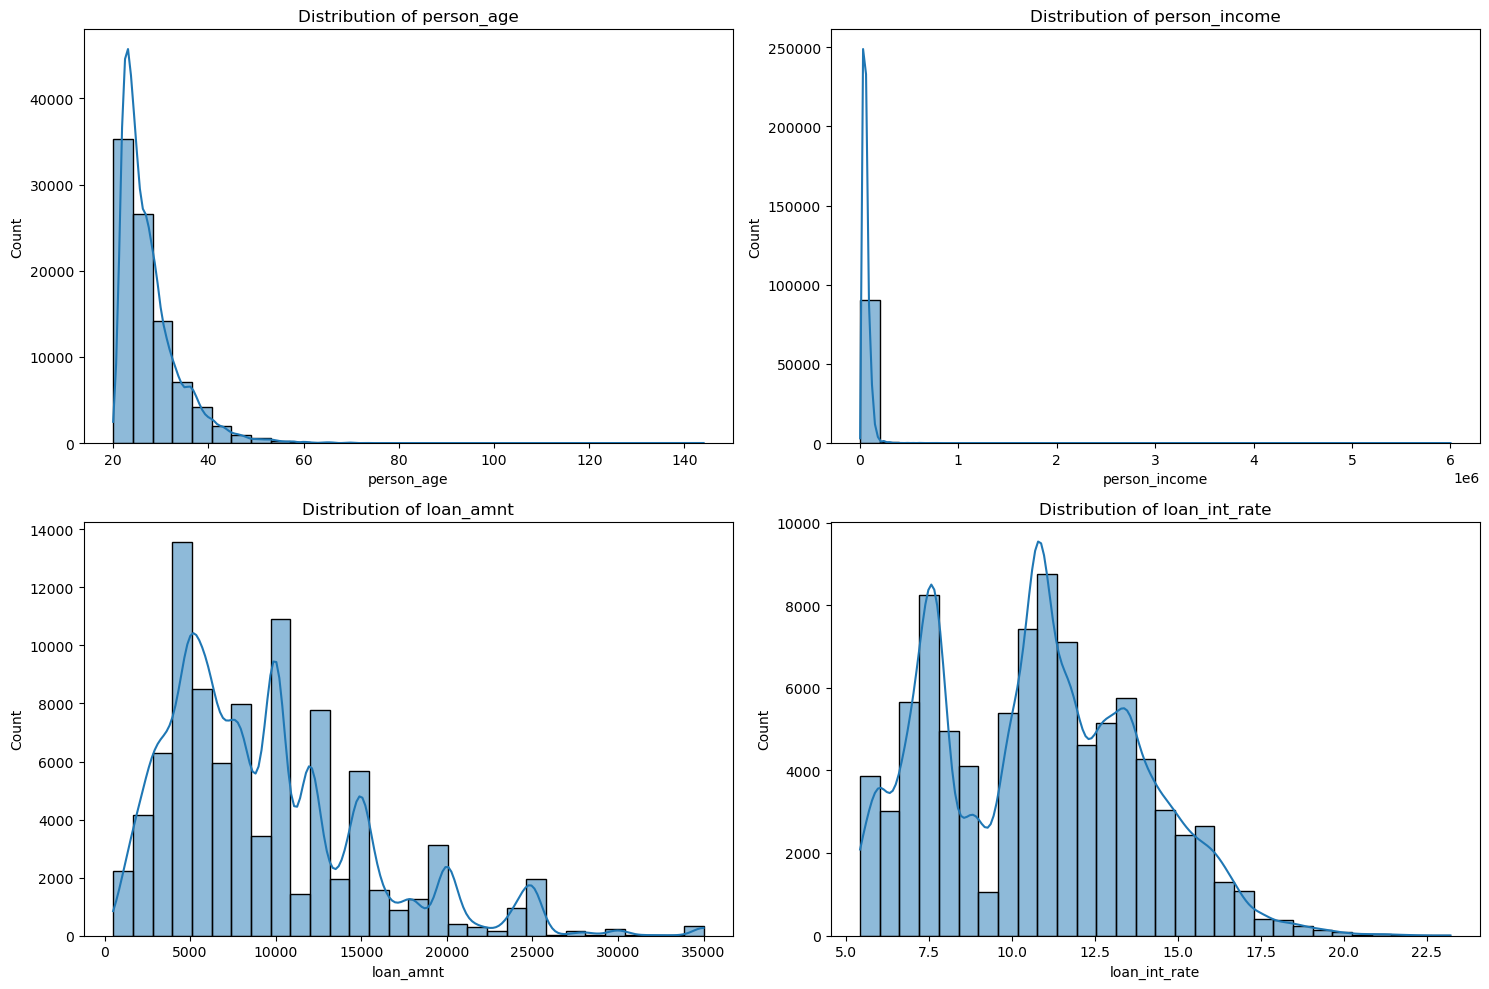

In [30]:
num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


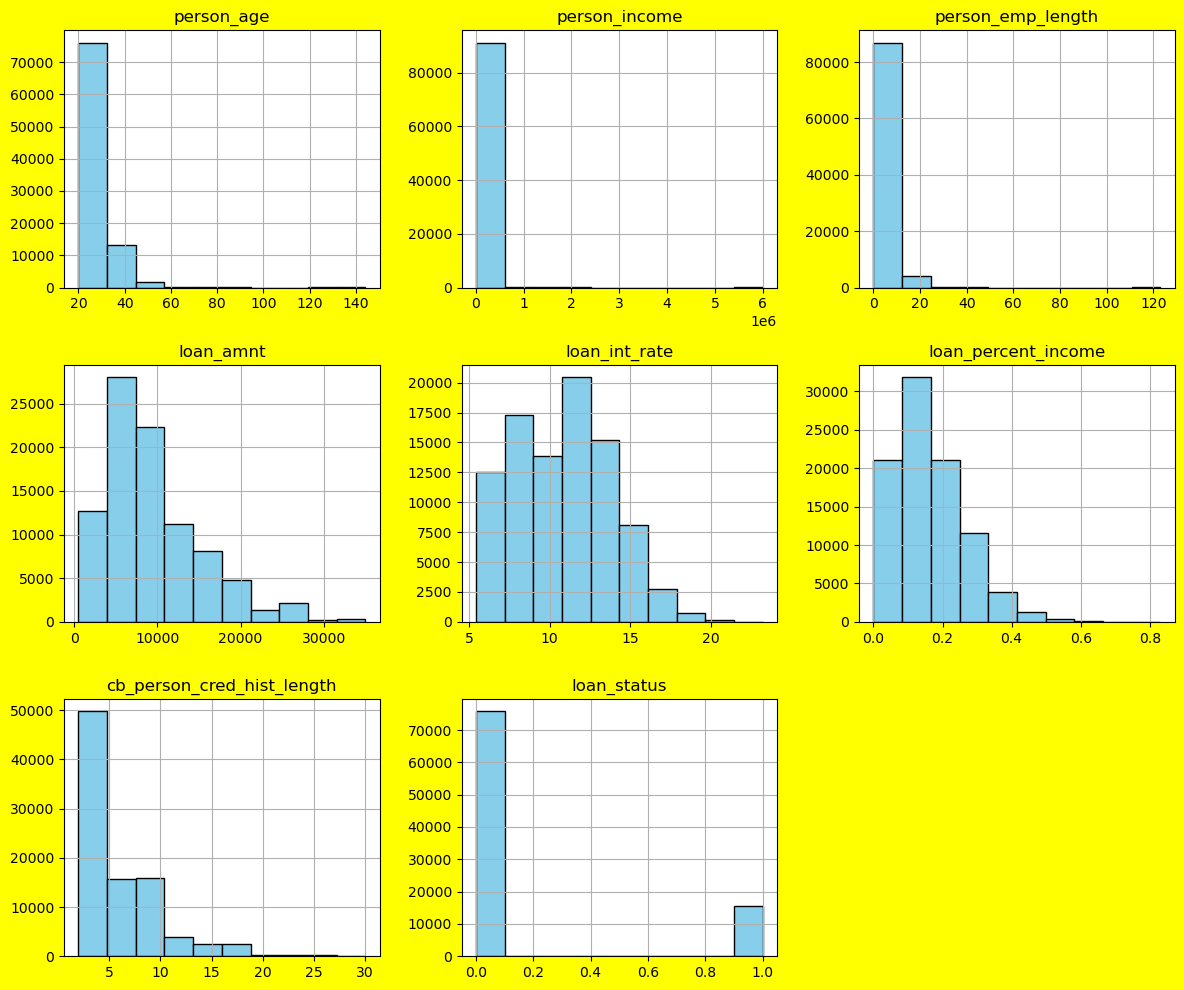

In [31]:
df_train.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('yellow')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


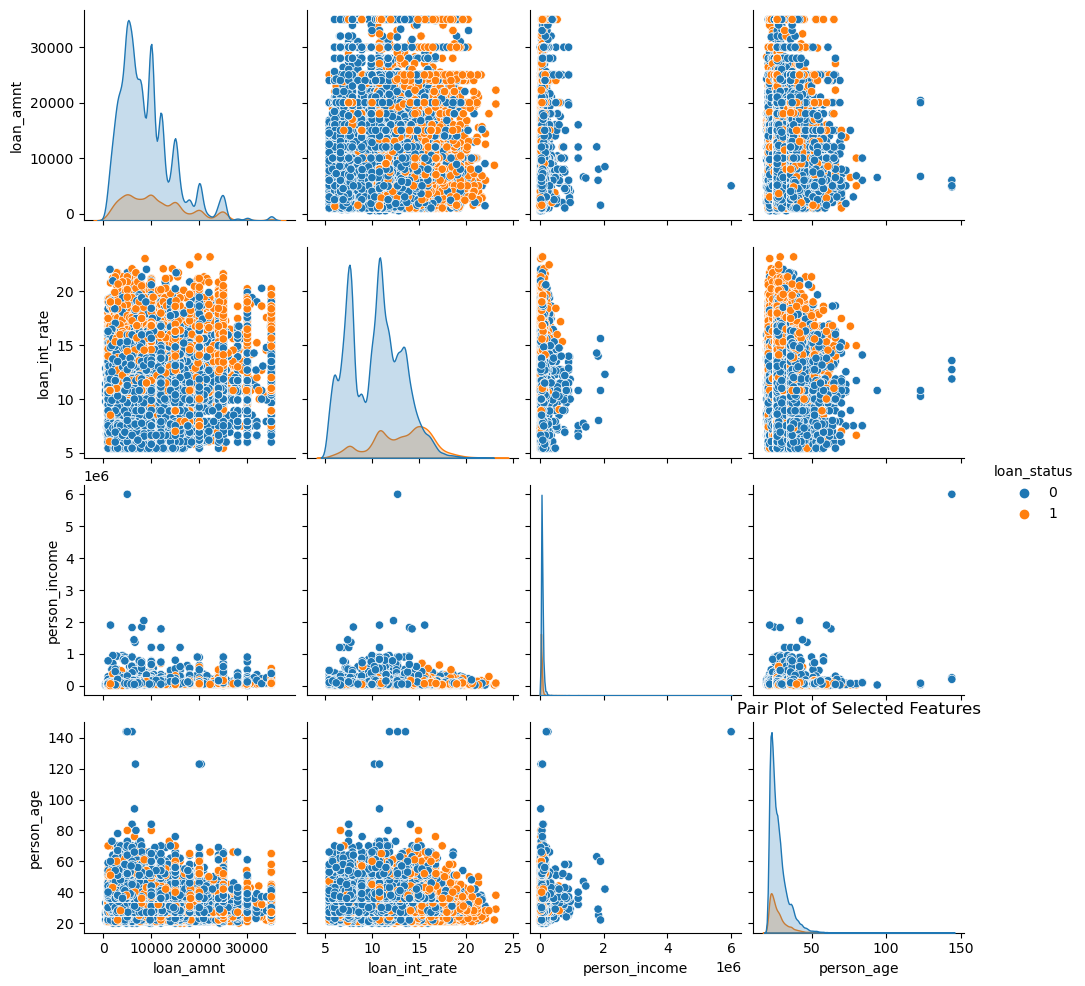

In [32]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age', 'loan_status']
sns.pairplot(df_train[subset_features], hue='loan_status')
plt.title('Pair Plot of Selected Features')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):  
    label_enc = LabelEncoder()   
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']    
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])    
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True) 
    target_col = 'loan_status'
    train_columns = df_train.drop(columns=[target_col]).columns    
    df_test = df_test.reindex(columns=train_columns, fill_value=0)    
    return df_train, df_test

df_train_processed, df_test_processed = preprocess_data(df_train, df_test)

In [34]:
df_train = df_train_processed
df_test = df_test_processed

In [35]:
df_train.shape,df_test.shape

((91226, 16), (39098, 15))

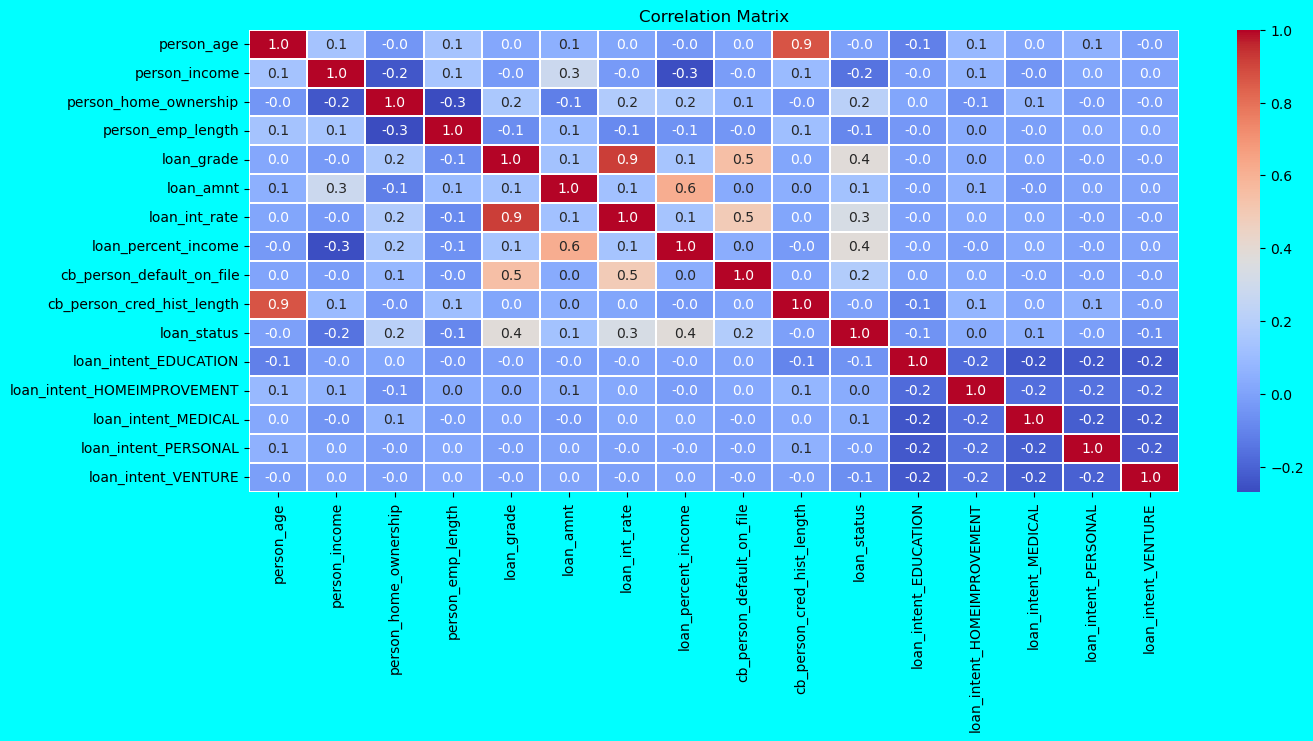

In [36]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.gcf().set_facecolor('#00FFFF')  
plt.title('Correlation Matrix')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    
    

    

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgreen; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 What We got from data, Lets have a look :</font></h3>

**Age and Credit History**: from above data anlysis one can see older individuals tend to have longer credit histories which states (strong positive correlation).

**Loan Grade and Interest Rate**: Higher loan grades are strongly associated with lower interest rates indicating how its association, indicating that loan risk is reflected in both metrics.

**Loan Amount and Income**: Larger loan amounts represent a higher percentage of the borrower's income, and higher-income individuals tend to borrow larger amounts trends in loan amounts.

**Loan Default**:
1. Certain criterea observed Higher loan grades and higher interest rates are both associated with a greater likelihood of loan default.
1. Borrowers who had a history of default tend to have worse loan grades.
1. Higherincome individuals and some with longer employment histories are less likely to have default on loans.
1. from plot one can see Higher percentages of income spent on loans increase the chances of default.
1. Loan Intent: There are negative correlations between loan intents like education and home improvement, meaning borrowers tend to focus on specific purposes for loans.

In summary, the data reveals that factors like age, income, loan grade, and interest rate are important predictors of loan behavior, including default risk.

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Regression Analysis♒🌊</h1>  
     
</div>

In [37]:
df_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [38]:
df_test.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
dtype: int64

In [39]:
def feature_engineering(df):
    
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']  
    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate'] 
    df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length'])
    df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
    df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']
    df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length'] 
    df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']  
    df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length'])
    df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length'])      
    df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt'] 
    
    return df

#median_income = df_train['person_income'].median()
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [40]:
y = df_train['loan_status'] 
df_train = df_train.drop(['loan_status'],axis=1)
X = df_train

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Algorithm Which requires Scaling♒🌊</h1>  
     
</div>

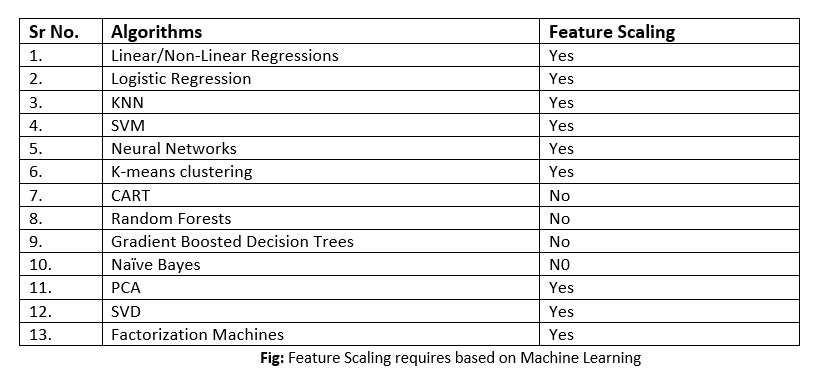

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [42]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

lgb_params = {
    'objective': 'binary',
    'n_estimators': 3000,
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'learning_rate': 0.0322942967545754,
    'num_leaves': 24,
    'max_depth': 15,
    'min_data_in_leaf': 25,  
    'feature_fraction': 0.6236144085285287, 
    'bagging_fraction': 0.9596685778433888, 
    'bagging_freq': 3,  
    'verbose': -1
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]    
   
    lgbm_model = LGBMClassifier(**lgb_params)
    lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='auc',
                   early_stopping_rounds=10,
                   verbose=False)    

    lgbm_fold_preds = lgbm_model.predict_proba(X_val)[:, 1]  
    lgbm_fold_test_preds = lgbm_model.predict_proba(scaled_test_data)[:, 1]   
    lgbm_predictions[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val    
    lgbm_test_predictions += lgbm_fold_test_preds / n_splits
overall_metric_lgbm = roc_auc_score(lgbm_true_labels, lgbm_predictions)
print("Overall AUC (LGBMClassifier with StratifiedKFold):", overall_metric_lgbm)

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=0.9596685778433888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9596685778433888
[LightGBM] [Warning] feature_fraction is set=0.6236144085285287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6236144085285287
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=0.9596685778433888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9596685778433888
[LightGBM] [Warning] feature_fraction is set=0.6236144085285287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6236144085285287
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=0.9596685778433888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9596685778433888
[LightGBM] [Warning] feature_fraction is set=0.6236144085285287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6236144085285287
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=0.9596685778433888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9596685778433888
[LightGBM] [Warning] feature_fraction is set=0.6236144085285287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6236144085285287
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=0.9596685778433888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9596685778433888
[LightGBM] [Warning] feature_fraction is set=0.6236144085285287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6236144085285287
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
Overall AUC (LGBMClassifier with StratifiedKFold): 0.9564899010276572


In [43]:
catboost_params = {
    'depth': 7,
    'learning_rate': 0.19893301995319765,
    'bagging_temperature': 0.7979373495258176,
    'l2_leaf_reg': 5,
    'loss_function': 'Logloss',
    'iterations': 400,
    'grow_policy': 'Lossguide',
    'eval_metric': 'AUC',
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

catboost_predictions = np.zeros(len(scaled_train_data))
catboost_true_labels = np.zeros(len(scaled_train_data))
catboost_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    catboost_model = CatBoostClassifier(**catboost_params)
    catboost_model.fit(X_train, y_train,
                       eval_set=(X_val, y_val),
                       early_stopping_rounds=10,
                       verbose=True)
  
    catboost_fold_preds = catboost_model.predict_proba(X_val)[:, 1]  
    catboost_fold_test_preds = catboost_model.predict_proba(scaled_test_data)[:, 1]  
    catboost_predictions[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val    
    catboost_test_predictions += catboost_fold_test_preds / n_splits
overall_metric_catboost = roc_auc_score(catboost_true_labels, catboost_predictions)
print("Overall AUC (CatBoostClassifier with StratifiedKFold):", overall_metric_catboost)

0:	test: 0.8511688	best: 0.8511688 (0)	total: 88ms	remaining: 35.1s
1:	test: 0.8578288	best: 0.8578288 (1)	total: 118ms	remaining: 23.5s
2:	test: 0.8798502	best: 0.8798502 (2)	total: 150ms	remaining: 19.9s
3:	test: 0.8988666	best: 0.8988666 (3)	total: 183ms	remaining: 18.1s
4:	test: 0.9066845	best: 0.9066845 (4)	total: 216ms	remaining: 17.1s
5:	test: 0.9146194	best: 0.9146194 (5)	total: 248ms	remaining: 16.3s
6:	test: 0.9188730	best: 0.9188730 (6)	total: 282ms	remaining: 15.9s
7:	test: 0.9212355	best: 0.9212355 (7)	total: 316ms	remaining: 15.5s
8:	test: 0.9264600	best: 0.9264600 (8)	total: 347ms	remaining: 15.1s
9:	test: 0.9285950	best: 0.9285950 (9)	total: 387ms	remaining: 15.1s
10:	test: 0.9312340	best: 0.9312340 (10)	total: 422ms	remaining: 14.9s
11:	test: 0.9321538	best: 0.9321538 (11)	total: 459ms	remaining: 14.8s
12:	test: 0.9334702	best: 0.9334702 (12)	total: 496ms	remaining: 14.8s
13:	test: 0.9339212	best: 0.9339212 (13)	total: 529ms	remaining: 14.6s
14:	test: 0.9351740	best: 0

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Plots from results for lightgbm♒🌊</h1>  
     
</div>

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

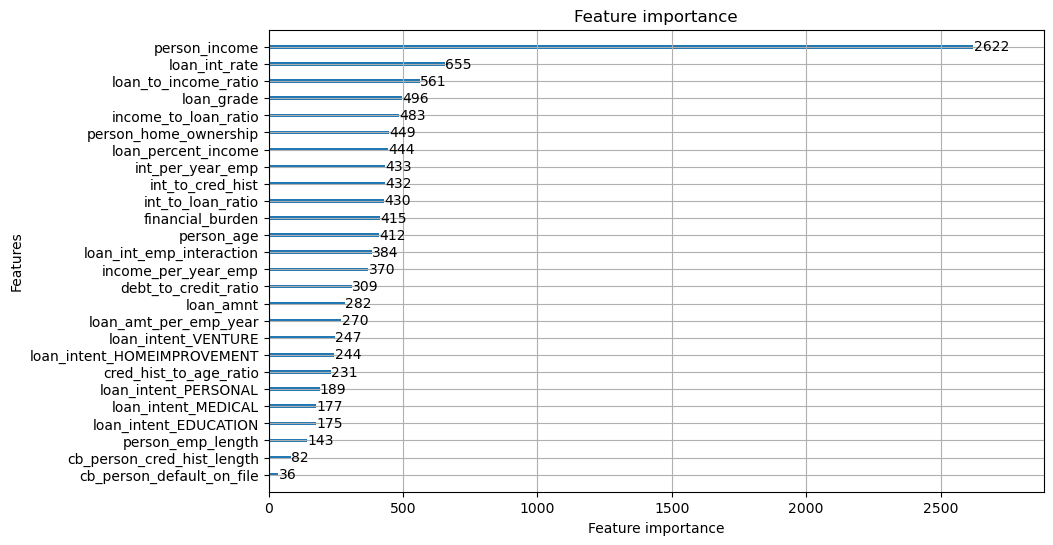

In [44]:
from lightgbm import plot_importance
plot_importance(lgbm_model,figsize=(10, 6))

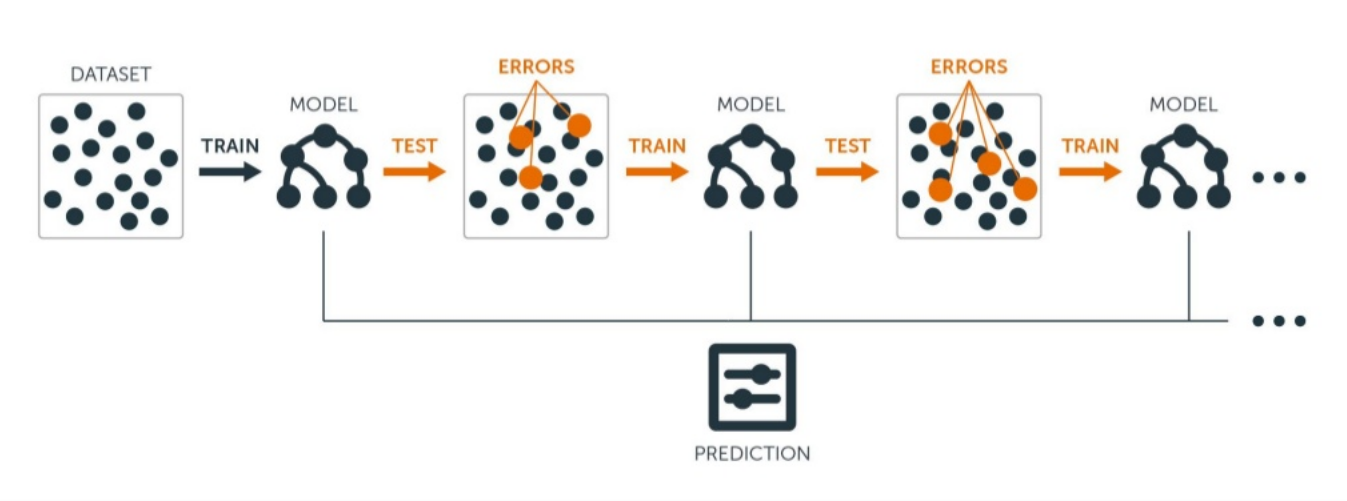

In [45]:
lgbm_model

LGBMClassifier(bagging_fraction=0.9596685778433888, bagging_freq=3,
               feature_fraction=0.6236144085285287,
               learning_rate=0.0322942967545754, max_depth=15,
               metric='binary_logloss', min_data_in_leaf=25, n_estimators=3000,
               num_leaves=24, objective='binary', random_state=42, verbose=-1)

In [46]:
import lime
import lime.lime_tabular

In [47]:
df_train.shape

(91226, 26)

In [48]:
df_train.head()

person_age  person_income  person_home_ownership  person_emp_length  \
0          37          35000                      3                0.0   
1          22          56000                      2                6.0   
2          29          28800                      2                8.0   
3          30          70000                      3               14.0   
4          22          60000                      3                2.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           1       6000          11.49                 0.17   
1           2       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           1      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  ...  \
0                          0                          14  ...   
1                          0                           2  ...   
2                          0                          10  ...   
3                          0                           5  ...   
4                          0                           3  ...   

   financial_burden  income_per_year_emp  cred_hist_to_age_ratio  \
0           68940.0                  inf                0.378378   
1           53400.0         9.333333e+03                0.090909   
2           53400.0         3.600000e+03                0.344828   
3          133320.0         5.000000e+03                0.166667   
4           41520.0         3.000000e+04                0.136364   

   int_to_loan_ratio  loan_int_emp_interaction  debt_to_credit_ratio  \
0           0.001915                      0.00            428.571429   
1           0.003337                     80.10           2000.000000   
2           0.001483                     71.20            600.000000   
3           0.000926                    155.54           2400.000000   
4           0.001153                     13.84           2000.000000   

   int_to_cred_hist  int_per_year_emp  loan_amt_per_emp_year  \
0          0.820714               inf                    inf   
1          6.675000          2.225000             666.666667   
2          0.890000          1.112500             750.000000   
3          2.222000          0.793571             857.142857   
4          2.306667          3.460000            3000.000000   

   income_to_loan_ratio  
0              5.833333  
1             14.000000  
2              4.800000  
3              5.833333  
4             10.000000  

[5 rows x 26 columns]

In [49]:
df_test.shape

(39098, 26)

In [50]:
#rows_with_inf = df_test[np.isinf(df_test).any(axis=1)]
#print("Rows with infinity values:")
#rows_with_inf

In [51]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(df_train.mean(), inplace=True)
print("DataFrame after replacing inf with column means:")
df_train.head()

DataFrame after replacing inf with column means:


person_age  person_income  person_home_ownership  person_emp_length  \
0          37          35000                      3                0.0   
1          22          56000                      2                6.0   
2          29          28800                      2                8.0   
3          30          70000                      3               14.0   
4          22          60000                      3                2.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           1       6000          11.49                 0.17   
1           2       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           1      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  ...  \
0                          0                          14  ...   
1                          0                           2  ...   
2                          0                          10  ...   
3                          0                           5  ...   
4                          0                           3  ...   

   financial_burden  income_per_year_emp  cred_hist_to_age_ratio  \
0           68940.0         19519.454848                0.378378   
1           53400.0          9333.333333                0.090909   
2           53400.0          3600.000000                0.344828   
3          133320.0          5000.000000                0.166667   
4           41520.0         30000.000000                0.136364   

   int_to_loan_ratio  loan_int_emp_interaction  debt_to_credit_ratio  \
0           0.001915                      0.00            428.571429   
1           0.003337                     80.10           2000.000000   
2           0.001483                     71.20            600.000000   
3           0.000926                    155.54           2400.000000   
4           0.001153                     13.84           2000.000000   

   int_to_cred_hist  int_per_year_emp  loan_amt_per_emp_year  \
0          0.820714          3.451274            2878.295562   
1          6.675000          2.225000             666.666667   
2          0.890000          1.112500             750.000000   
3          2.222000          0.793571             857.142857   
4          2.306667          3.460000            3000.000000   

   income_to_loan_ratio  
0              5.833333  
1             14.000000  
2              4.800000  
3              5.833333  
4             10.000000  

[5 rows x 26 columns]

In [52]:
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
print("DataFrame after replacing inf with column means:")
df_test.head()

DataFrame after replacing inf with column means:


person_age  person_income  person_home_ownership  person_emp_length  \
0          23          69000                      3                3.0   
1          26          96000                      0                6.0   
2          26          30000                      3                5.0   
3          33          50000                      3                4.0   
4          26         102000                      0                8.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           5      25000          15.76                 0.36   
1           2      10000          12.68                 0.10   
2           4       4000          17.19                 0.13   
3           0       7000           8.90                 0.14   
4           3      15000          16.32                 0.15   

   cb_person_default_on_file  cb_person_cred_hist_length  ...  \
0                          0                           2  ...   
1                          1                           4  ...   
2                          1                           2  ...   
3                          0                           7  ...   
4                          1                           4  ...   

   financial_burden  income_per_year_emp  cred_hist_to_age_ratio  \
0          394000.0              23000.0                0.086957   
1          126800.0              16000.0                0.153846   
2           68760.0               6000.0                0.076923   
3           62300.0              12500.0                0.212121   
4          244800.0              12750.0                0.153846   

   int_to_loan_ratio  loan_int_emp_interaction  debt_to_credit_ratio  \
0           0.000630                     47.28               12500.0   
1           0.001268                     76.08                2500.0   
2           0.004298                     85.95                2000.0   
3           0.001271                     35.60                1000.0   
4           0.001088                    130.56                3750.0   

   int_to_cred_hist  int_per_year_emp  loan_amt_per_emp_year  \
0          7.880000          5.253333            8333.333333   
1          3.170000          2.113333            1666.666667   
2          8.595000          3.438000             800.000000   
3          1.271429          2.225000            1750.000000   
4          4.080000          2.040000            1875.000000   

   income_to_loan_ratio  
0              2.760000  
1              9.600000  
2              7.500000  
3              7.142857  
4              6.800000  

[5 rows x 26 columns]

In [53]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X, 
                                                   feature_names=X_train.columns, 
                                                   class_names=['0', '1'], 
                                                   kernel_width=5)


/tmp/ipykernel_21/726204458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_21/726204458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


In [54]:
redict_fn_lgb = lambda x: lgbm_model.predict_proba(x).astype(float)
#X = X_train.values
#explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['0','1'],kernel_width=5)

In [55]:
choosen_instance = X_val.loc[[32558]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [56]:
choosen_instance = X_val.loc[[32562]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [57]:
choosen_instance = X_val.loc[[25]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [58]:
choosen_instance = X_val.loc[[10]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [59]:
df_sub.head()

id  loan_status
0  58645          0.5
1  58646          0.5
2  58647          0.5
3  58648          0.5
4  58649          0.5

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">⚒🌊How well The prediction fit♒🌊</h1>  
     
</div>

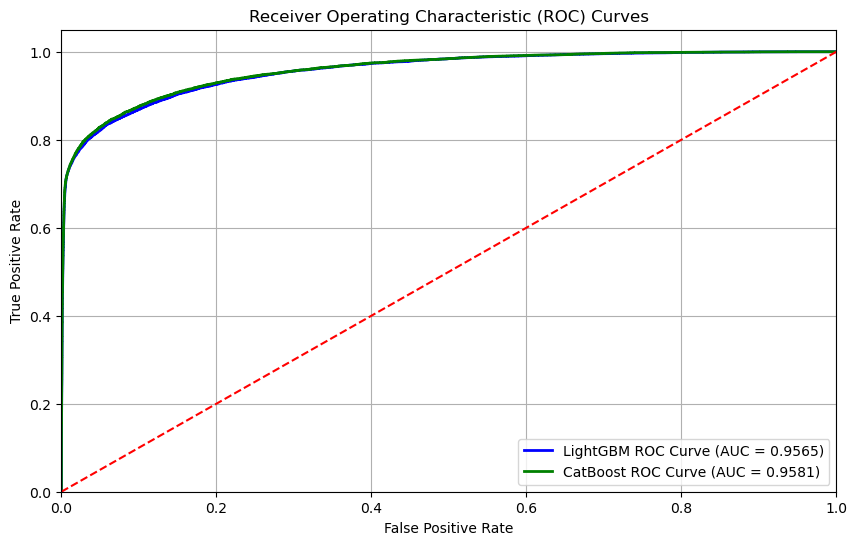

In [60]:
from sklearn.metrics import roc_curve, auc
fpr_lgbm, tpr_lgbm, _ = roc_curve(lgbm_true_labels, lgbm_predictions)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

fpr_catboost, tpr_catboost, _ = roc_curve(catboost_true_labels, catboost_predictions)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label=f'LightGBM ROC Curve (AUC = {roc_auc_lgbm:.4f})')
plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost ROC Curve (AUC = {roc_auc_catboost:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🗞📜Final Submission♒🌊</h1>  
     
</div>

In [61]:
df_sub['loan_status'] = lgbm_test_predictions*0.2 + catboost_test_predictions*0.8 #+ xgb_test_predictions*0.0

In [62]:
df_sub.head()

id  loan_status
0  58645     0.998960
1  58646     0.037131
2  58647     0.534356
3  58648     0.012696
4  58649     0.062985

In [63]:
df_sub.to_csv('submission.csv', index=False)

<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Looking Forward for feeback </h1>  
     
</div>

<a id="1.4"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b>  Refrences</b></div>